# Effective Portfolio Optimisation using Monte Carlo Simulation

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#reading the dataset using pandas and storing it in a dictionary
raw_data = {}
raw_data['INFY'] = pd.read_csv('/kaggle/input/historical-datas/INFY.csv')
raw_data['SUNPHARMA'] = pd.read_csv('/kaggle/input/historical-datas/SUNPHARMA.csv')
raw_data['ITC'] = pd.read_csv('/kaggle/input/historical-datas/ITC.csv')
raw_data['COALINDIA'] = pd.read_csv('/kaggle/input/historical-datas/COALINDIA.csv')
raw_data['SBIN'] = pd.read_csv('/kaggle/input/historical-datas/SBIN.csv')

In [3]:
#visualising a dataset
raw_data['SBIN']

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,SBIN,EQ,08-Aug-2019,289.90,290.00,295.5,285.60,295.20,294.35,290.32,32929233,9.559949e+09,251938,11332747,34.42
1,SBIN,N5,08-Aug-2019,11476.68,11500.00,11510.0,11460.00,11472.00,11471.86,11476.71,240,2.754410e+06,36,215,89.58
2,SBIN,EQ,09-Aug-2019,294.35,296.30,298.0,290.05,291.85,291.35,294.37,23377581,6.881753e+09,176813,5896369,25.22
3,SBIN,N2,09-Aug-2019,11210.00,11200.00,11269.9,11200.00,11269.90,11252.84,11207.12,80,8.965699e+05,10,80,100.00
4,SBIN,N5,09-Aug-2019,11471.86,11499.99,11500.0,11450.00,11450.00,11450.00,11476.78,131,1.503459e+06,24,120,91.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,SBIN,N5,05-Aug-2020,10838.48,10836.00,10850.0,10830.10,10845.00,10843.57,10841.47,486,5.268954e+06,80,483,99.38
900,SBIN,N6,05-Aug-2020,10740.00,10750.00,10750.0,10750.00,10750.00,10750.00,10750.00,10,1.075000e+05,2,10,100.00
901,SBIN,EQ,06-Aug-2020,191.45,192.30,194.5,190.25,191.15,190.95,192.34,59740299,1.149069e+10,239032,7633674,12.78
902,SBIN,N2,06-Aug-2020,10764.68,10775.00,10775.0,10730.00,10730.00,10730.00,10756.19,44,4.732725e+05,13,44,100.00


Here we see that in series column there are other values than 'EQ'

In [4]:
print(', '.join(raw_data['SBIN']['Series'].unique()))


EQ, N5, N2, N6


There are values like N5,N2,N6 in the series column other than EQ which represents bonds,debuntures floated by company so we have to remove these since we are considering for equity segments only.

In [5]:
datas = {}

for name,data in raw_data.items():
    datas[name] = raw_data[name][raw_data[name]['Series']=='EQ'].reset_index()

In [6]:
datas['SBIN']

,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0,SBIN,EQ,08-Aug-2019,289.90,290.00,295.50,285.60,295.20,294.35,290.32,32929233,9.559949e+09,251938,11332747,34.42
1,2,SBIN,EQ,09-Aug-2019,294.35,296.30,298.00,290.05,291.85,291.35,294.37,23377581,6.881753e+09,176813,5896369,25.22
2,5,SBIN,EQ,13-Aug-2019,291.35,290.90,291.55,282.50,283.00,283.35,287.06,24231272,6.955786e+09,187371,9930136,40.98
3,8,SBIN,EQ,14-Aug-2019,283.35,285.05,291.25,284.50,289.00,289.75,288.44,18523649,5.342962e+09,161888,5691581,30.73
4,10,SBIN,EQ,16-Aug-2019,289.75,287.95,292.80,284.30,290.30,290.90,288.71,20047399,5.787838e+09,152551,4429625,22.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,887,SBIN,EQ,31-Jul-2020,186.55,188.00,194.85,186.70,191.05,191.45,191.75,145903102,2.797706e+10,567541,19089678,13.08
241,890,SBIN,EQ,03-Aug-2020,191.45,192.00,194.60,190.05,192.30,192.25,192.68,72457670,1.396079e+10,308823,9698233,13.38
242,894,SBIN,EQ,04-Aug-2020,192.25,193.35,193.80,190.50,191.95,191.60,191.84,43867110,8.415652e+09,176987,6362150,14.50
243,897,SBIN,EQ,05-Aug-2020,191.60,192.75,196.85,191.00,191.80,191.45,193.91,68888954,1.335821e+10,271605,9480012,13.76


Now extracting the closing price of stocks and storing it in a dataframe call 'CP_df'

In [7]:
CP_dict = {}

for name,data in datas.items():
    CP_dict[name] = datas[name]['Close Price']
    
CP_df = pd.DataFrame(CP_dict)
CP_df

,INFY,SUNPHARMA,ITC,COALINDIA,SBIN
0,788.75,426.45,257.75,211.85,294.35
1,789.85,422.00,254.20,207.60,291.35
2,764.75,439.25,246.30,203.75,283.35
3,774.80,417.15,248.75,200.50,289.75
4,774.55,414.70,253.00,201.95,290.90
...,...,...,...,...,...
240,966.00,531.70,194.15,129.25,191.45
241,956.90,519.40,192.60,128.40,192.25
242,949.85,528.95,193.65,128.75,191.60
243,944.70,528.85,192.80,128.45,191.45


Now all the prerprocessing is done. Now lets calculate the Portfolio Return and Volatility.<br />
<br />
First I will calculate with equal weight to each stock 

In [8]:
daily_return = np.log(CP_df.pct_change() + 1).dropna()
#Here I am calculating log daily returns and removing the first empty column of each stock

#Now calculating mean of those daily return
daily_return_mean = np.array(daily_return.mean())

#Now assigning weights
#Since there are five stocks so each will have a weight of 0.2 (1/5)
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [9]:
#Calculating Portfolio Return
Port_return = np.sum(weights * daily_return_mean)

print('The Annual Return of Portfolio is {}%'.format((Port_return * 252)*100))
#Here 252 is multiplied for annual calculation i.e. 252 trading days in a year

The Annual Return of Portfolio is -16.066942126394633%


In [10]:
#Calculating Portfolio Volatility
cov = daily_return.cov()
Port_Vol = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))

print('The Annual Volatility of Portfolio is {}%'.format((Port_Vol * np.sqrt(252))*100))

The Annual Volatility of Portfolio is 29.3337680142018%


**Monte Carlo Simulation**

In [11]:
#Declare the number of Portfolio to be generated
num_portfolio = 30000

#creating a empty list for storing returns,volatility,sharpe_ratio(return/volatility) and weightage of each stock in portfolio
results = np.zeros((3 + len(daily_return.columns),num_portfolio))



#Monte Carlo Simulation
for i in range(num_portfolio):
    
    weight = np.random.rand(len(daily_return.columns)) #Declaring random weights
    weight = weight/np.sum(weight) #So that sum of all weight will be equal to 1

    p_annual_return = np.sum(weight * daily_return_mean) * 252 #Annual Return
    p_annual_volatility = np.sqrt(np.dot(weight.T,np.dot(cov,weight))) * np.sqrt(252) #Annual Volatility
    
    #Storing the values in results list
    results[0,i] = p_annual_return
    results[1,i] = p_annual_volatility
    results[2,i] = results[0,i]/results[1,i]

    for j in range(len(weight)):
        results[j+3,i] =  weight[j]
        
        
        
#Making a dataframe for results list of all generated Portfolio
cols = ['Ann_Ret','Ann_Vol','Sharpe_Ratio']
for num in range(len(list(daily_return.columns))):
    cols.append(list(daily_return.columns)[num])

    
result_df = pd.DataFrame(results.T,columns=cols)



In [12]:
#Visulising the result dataframe
result_df

,Ann_Ret,Ann_Vol,Sharpe_Ratio,INFY,SUNPHARMA,ITC,COALINDIA,SBIN
0,-0.174012,0.316087,-0.550521,0.198180,0.134634,0.332338,0.038172,0.296675
1,-0.090541,0.343667,-0.263457,0.093001,0.437191,0.005678,0.022416,0.441713
2,-0.205923,0.305029,-0.675092,0.211652,0.183730,0.036635,0.436078,0.131904
3,-0.221300,0.328918,-0.672813,0.290889,0.065363,0.044845,0.272585,0.326317
4,-0.398060,0.349474,-1.139025,0.054459,0.020437,0.158433,0.396526,0.370145
...,...,...,...,...,...,...,...,...
29995,-0.289137,0.352684,-0.819818,0.006479,0.246475,0.024687,0.255575,0.466784
29996,-0.224240,0.306721,-0.731088,0.150639,0.166314,0.167967,0.245171,0.269908
29997,-0.071450,0.292073,-0.244631,0.154363,0.298469,0.472322,0.063232,0.011613
29998,-0.213329,0.333240,-0.640166,0.298339,0.048301,0.099657,0.185959,0.367743


In [13]:
#locating 
#Portfolio 1 - Sharpe ratio is the highest (Return/Volatility)
#Portfolio 2 - Volatility is the lowest
            

#Portfolio 1
max_sharpe_ratio = result_df.iloc[result_df['Sharpe_Ratio'].idxmax()]

#Portfolio 2
volatility_lowest = result_df.iloc[result_df['Ann_Vol'].idxmin()]

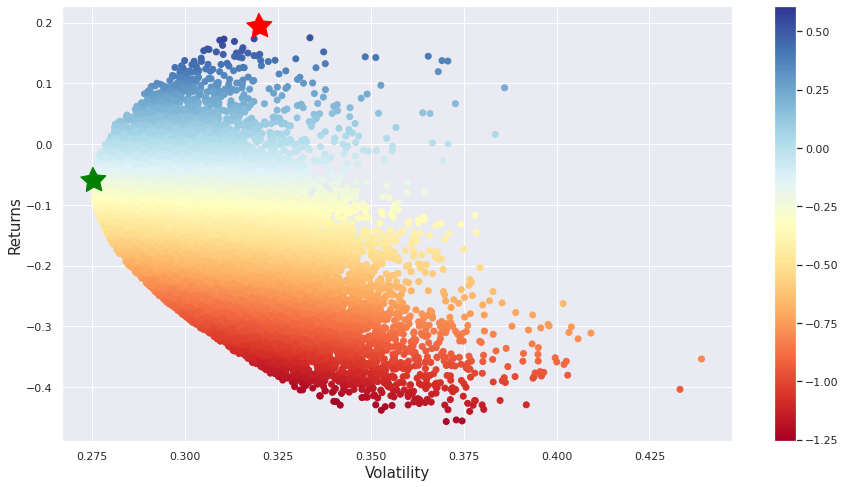

In [14]:
#Plotting the simulation
plt.figure(figsize=(15,8))
plt.scatter(result_df['Ann_Vol'],result_df['Ann_Ret'],c =result_df['Sharpe_Ratio'],cmap='RdYlBu')
plt.colorbar()

plt.scatter(max_sharpe_ratio[1],max_sharpe_ratio[0],marker = (5,1,3),color='red',s=700) #Red - Portfolio 1
plt.scatter(volatility_lowest[1],volatility_lowest[0],marker = (5,1,3),color='green',s=700)#Green - Portfolio 2
            

plt.xlabel('Volatility',fontsize = 15)
plt.ylabel('Returns',fontsize = 15)
plt.show()

   # Conclusion:

In [15]:
print('The Portfolio with maximum Return(or Sharpe_Ratio) is:')
print('All values in percentage')
print(round(max_sharpe_ratio * 100,2))

The Portfolio with maximum Return(or Sharpe_Ratio) is:
All values in percentage
Ann_Ret         19.41
Ann_Vol         32.00
Sharpe_Ratio    60.64
INFY            48.74
SUNPHARMA       47.12
ITC              0.74
COALINDIA        1.53
SBIN             1.87
Name: 20761, dtype: float64


In [16]:
print('The Portfolio with least Volatility is:')
print('All values in percentage')
print(round(volatility_lowest * 100,2))

The Portfolio with least Volatility is:
All values in percentage
Ann_Ret         -5.85
Ann_Vol         27.52
Sharpe_Ratio   -21.27
INFY            21.84
SUNPHARMA       32.54
ITC             23.90
COALINDIA       21.59
SBIN             0.13
Name: 19124, dtype: float64


### Thank you.
### Feel free to copy and edit the kernel with your desired stock datas

*Made a website where the input takes stock tickers(NSE) and number of portfolios then calculates the least volatile and maximum return portfolio along with simulation of effective frontier.*
*Link : https://intense-hollows-58536.herokuapp.com/*
